# IMPORTS

In [1]:
from make_plots import plot_activity,create_corr_matrix,cluster3D,cluster2D,plot_histograms_qqplots,boxplot,cluster3D,cluster2D,mean_and_std
from data_pre import create_dataframe,normal_data_Standard,window_data,get_balanced_dataset,remove_duplicates,remove_outliersIQR,descritize_by_bounds,pca_test
from classification_models import bay_net_structure,random_forest,nn
from clustering import minibatch_kmeans,dbscan,birch,purity_metric
import numpy as np

/home/lefteris/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-06-04 13:57:51.157363: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-04 13:57:51.178962: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-04 13:57:51.504449: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Create DataFrame

In [2]:
data=create_dataframe()
data=data.drop(columns=['index','Unnamed: 0'])


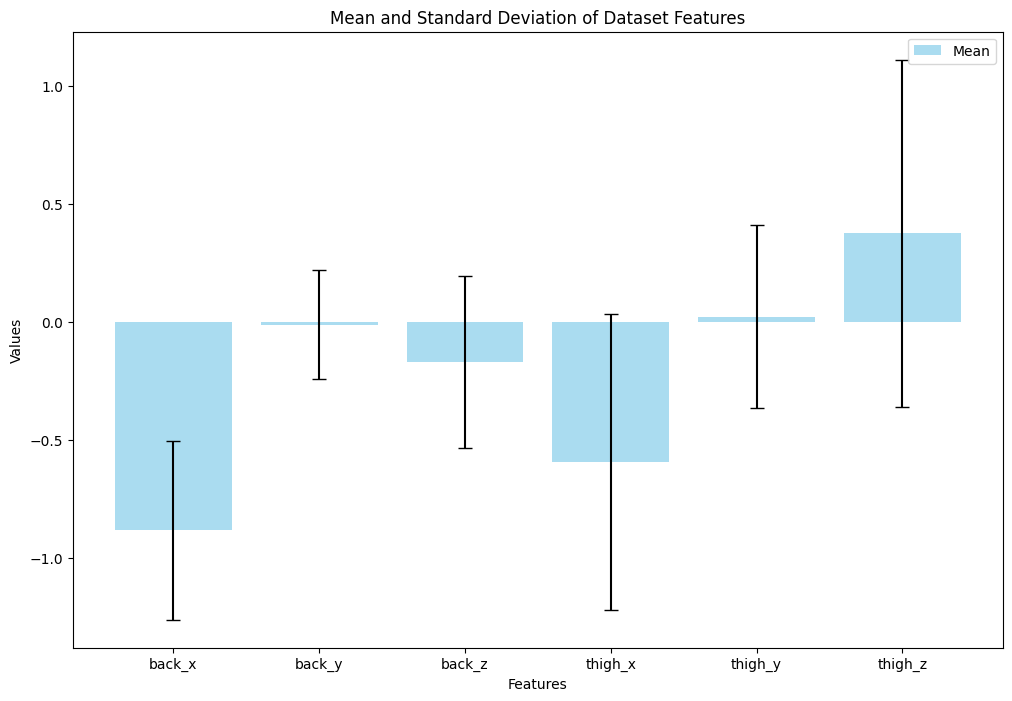

In [3]:
mean_and_std(data)

In [4]:
dnd=remove_duplicates(data)
print(data.shape)

(6461328, 9)


## Plot the number of data for each class

<Axes: title={'center': 'Training examples by activity type'}, xlabel='label'>

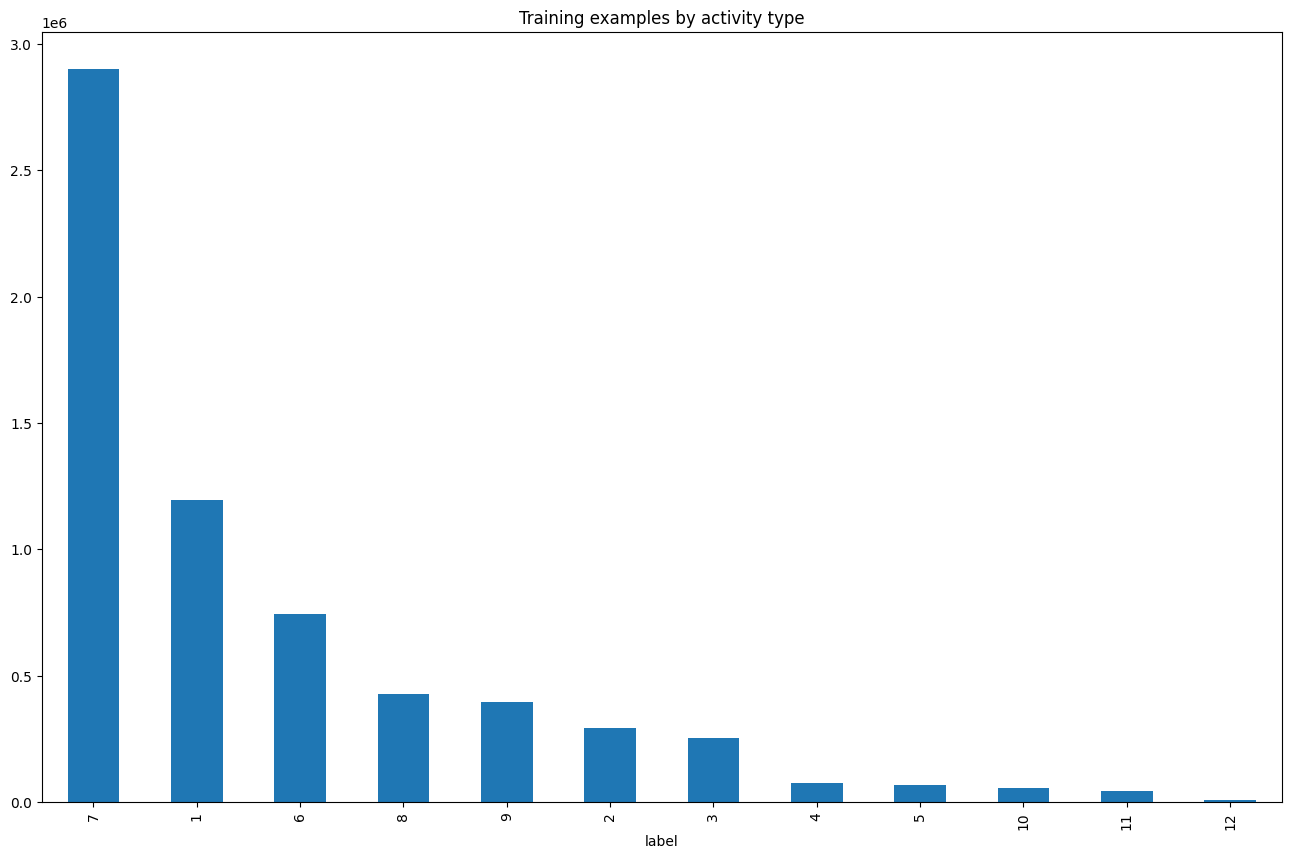

In [5]:
countofActivity=data['label'].value_counts()
countofActivity.plot(kind='bar', title='Training examples by activity type',figsize=(16,10))

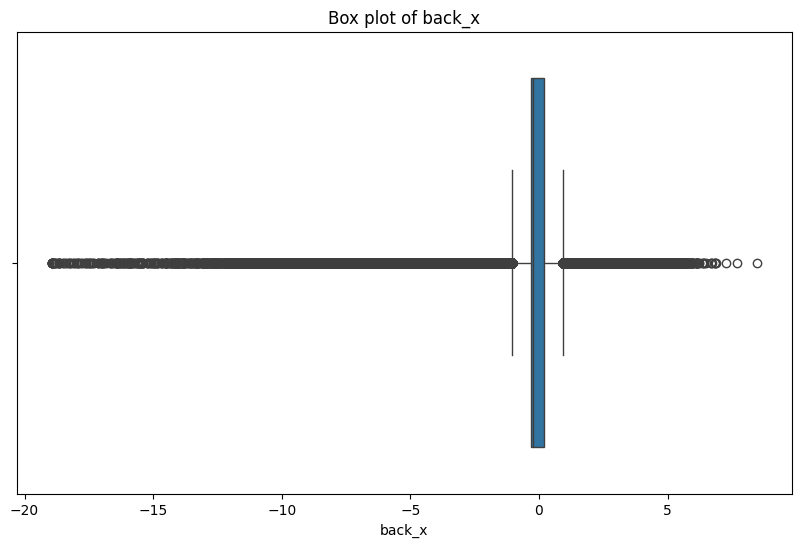

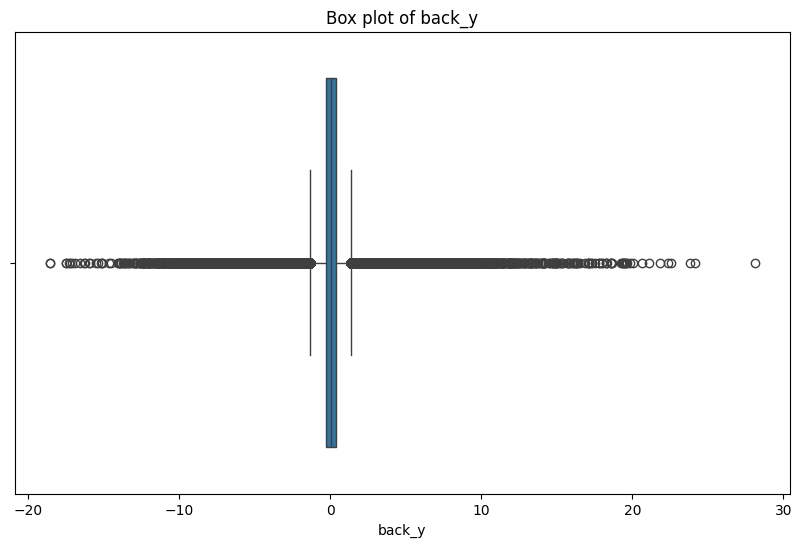

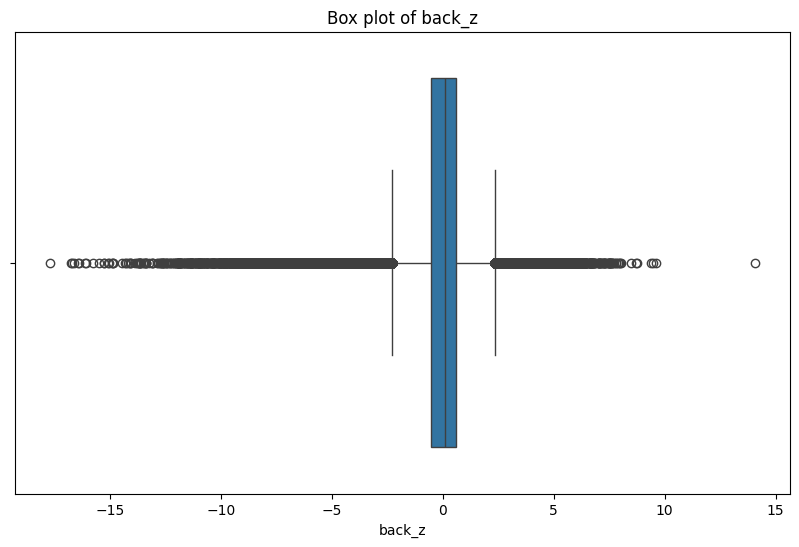

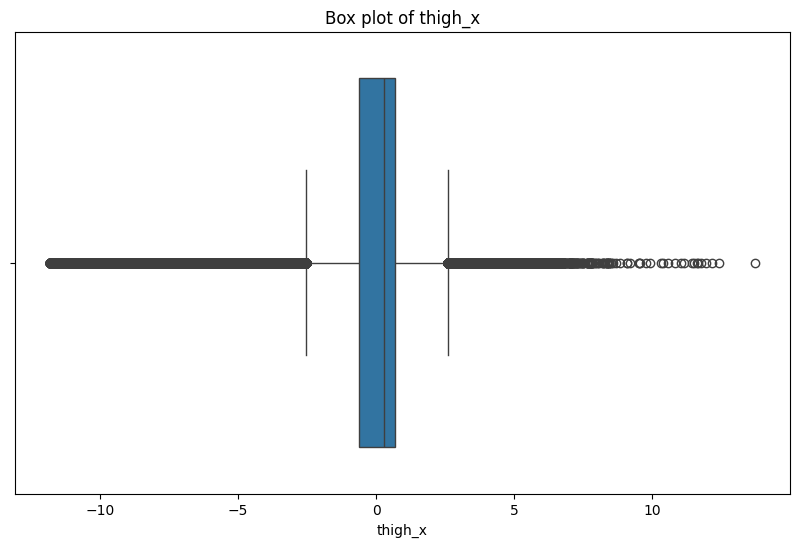

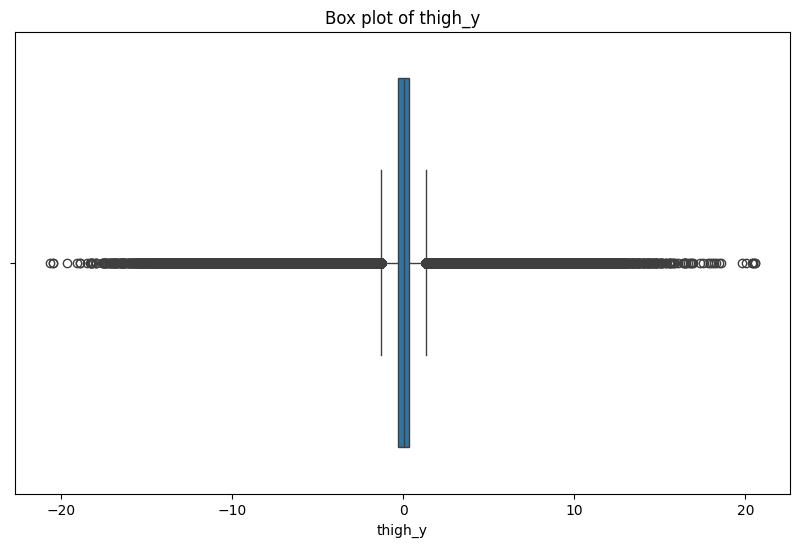

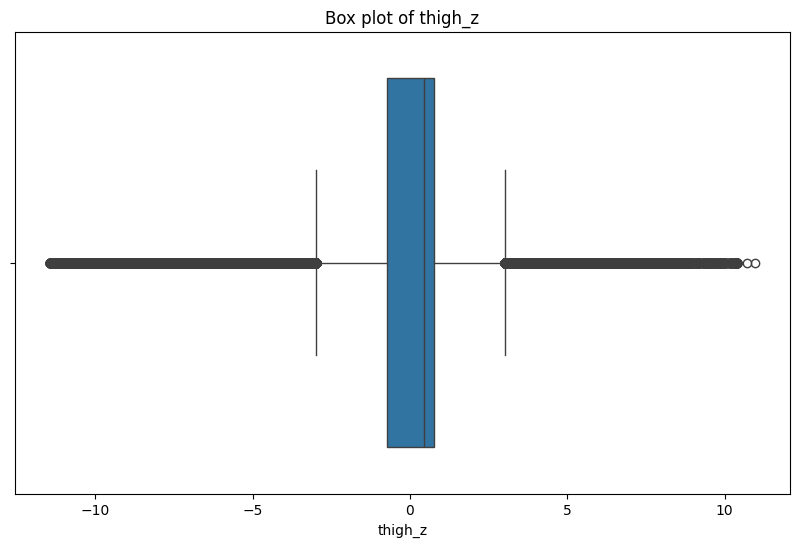

  Removed 91338 outliers
  Removed 244095 outliers
  Removed 846 outliers
  Removed 26035 outliers
  Removed 74910 outliers
  Removed 11247 outliers


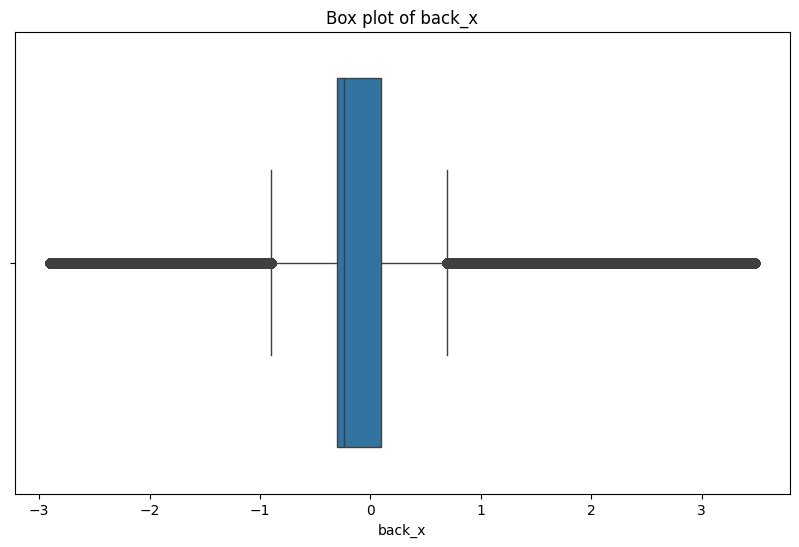

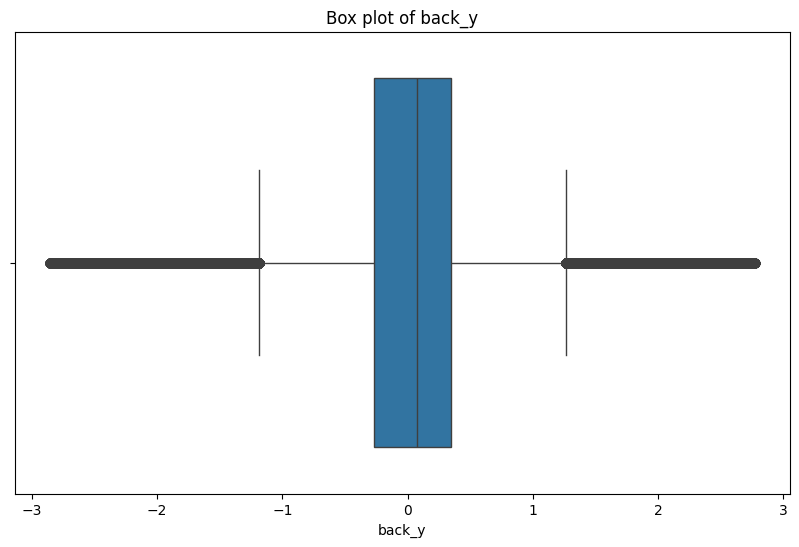

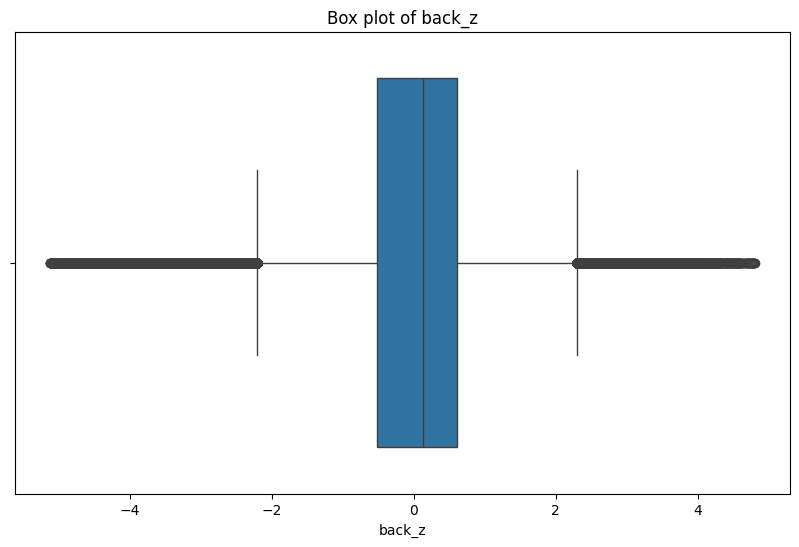

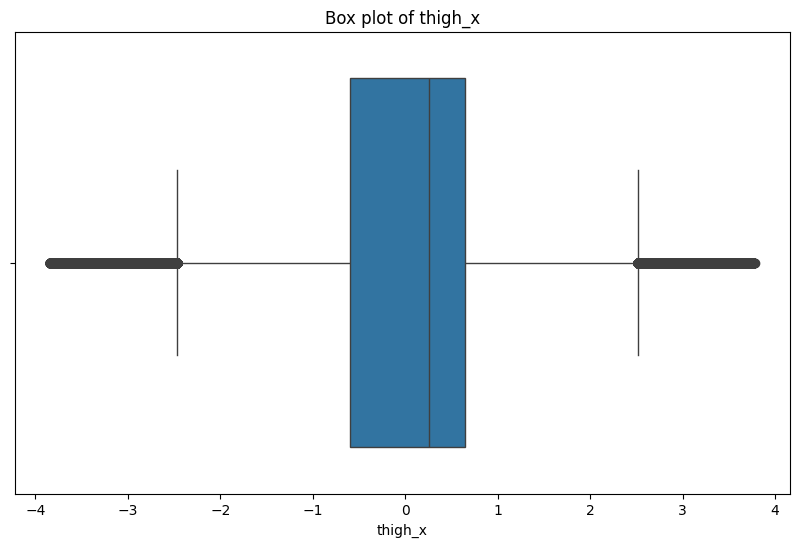

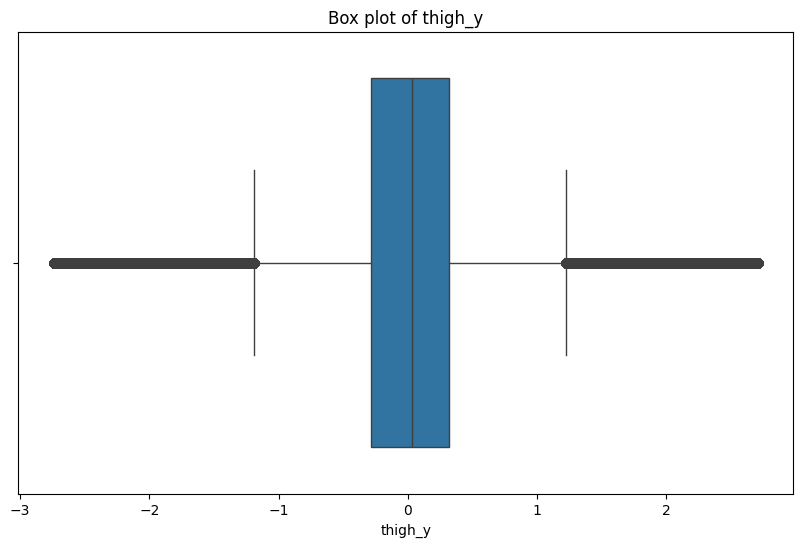

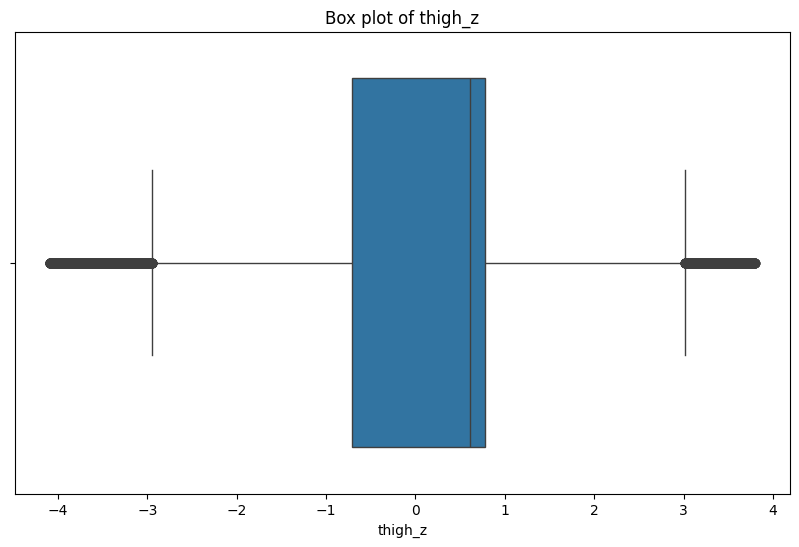

In [8]:
zdata=normal_data_Standard(dnd)
boxplot(zdata,1000)
data_filtered=remove_outliersIQR(zdata,1.5,0.1,0.90) 
boxplot(data_filtered,1000)

In [7]:
countofActivity=data_filtered['label'].value_counts()
print(countofActivity)

label
7     2898305
1     1174075
6      743044
8      404791
9      393889
2      260391
3      254670
4       76065
5       66873
10      55638
11      41765
12       7861
Name: count, dtype: int64


## Balance dataset and see distribution

(84000, 7)
(84000, 9)


/home/lefteris/.local/lib/python3.10/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


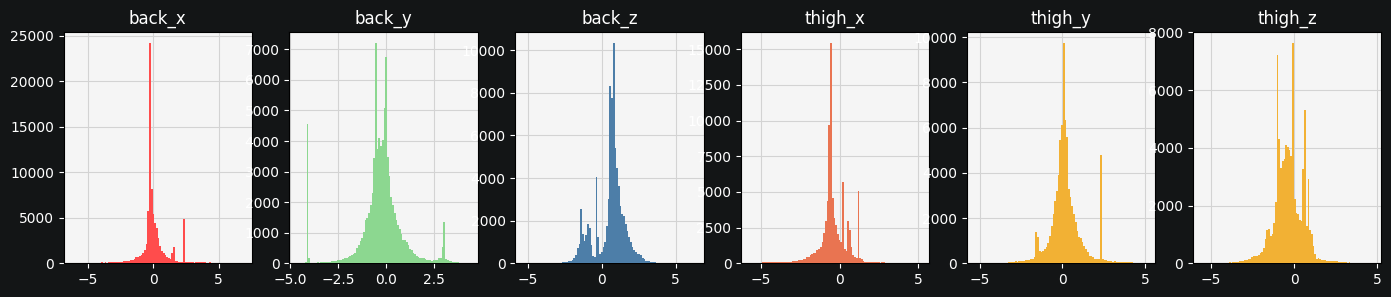

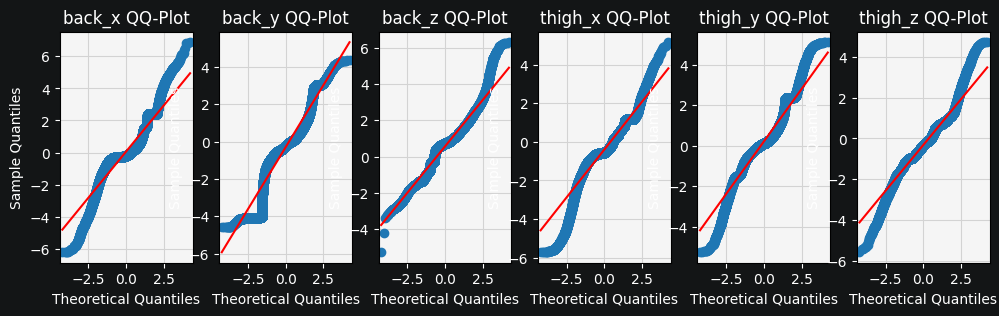

In [8]:
data_filtered_balanced=get_balanced_dataset(data_filtered)
bdata=get_balanced_dataset(data) 
plot_histograms_qqplots(data_filtered_balanced)


# Correlation Analysis

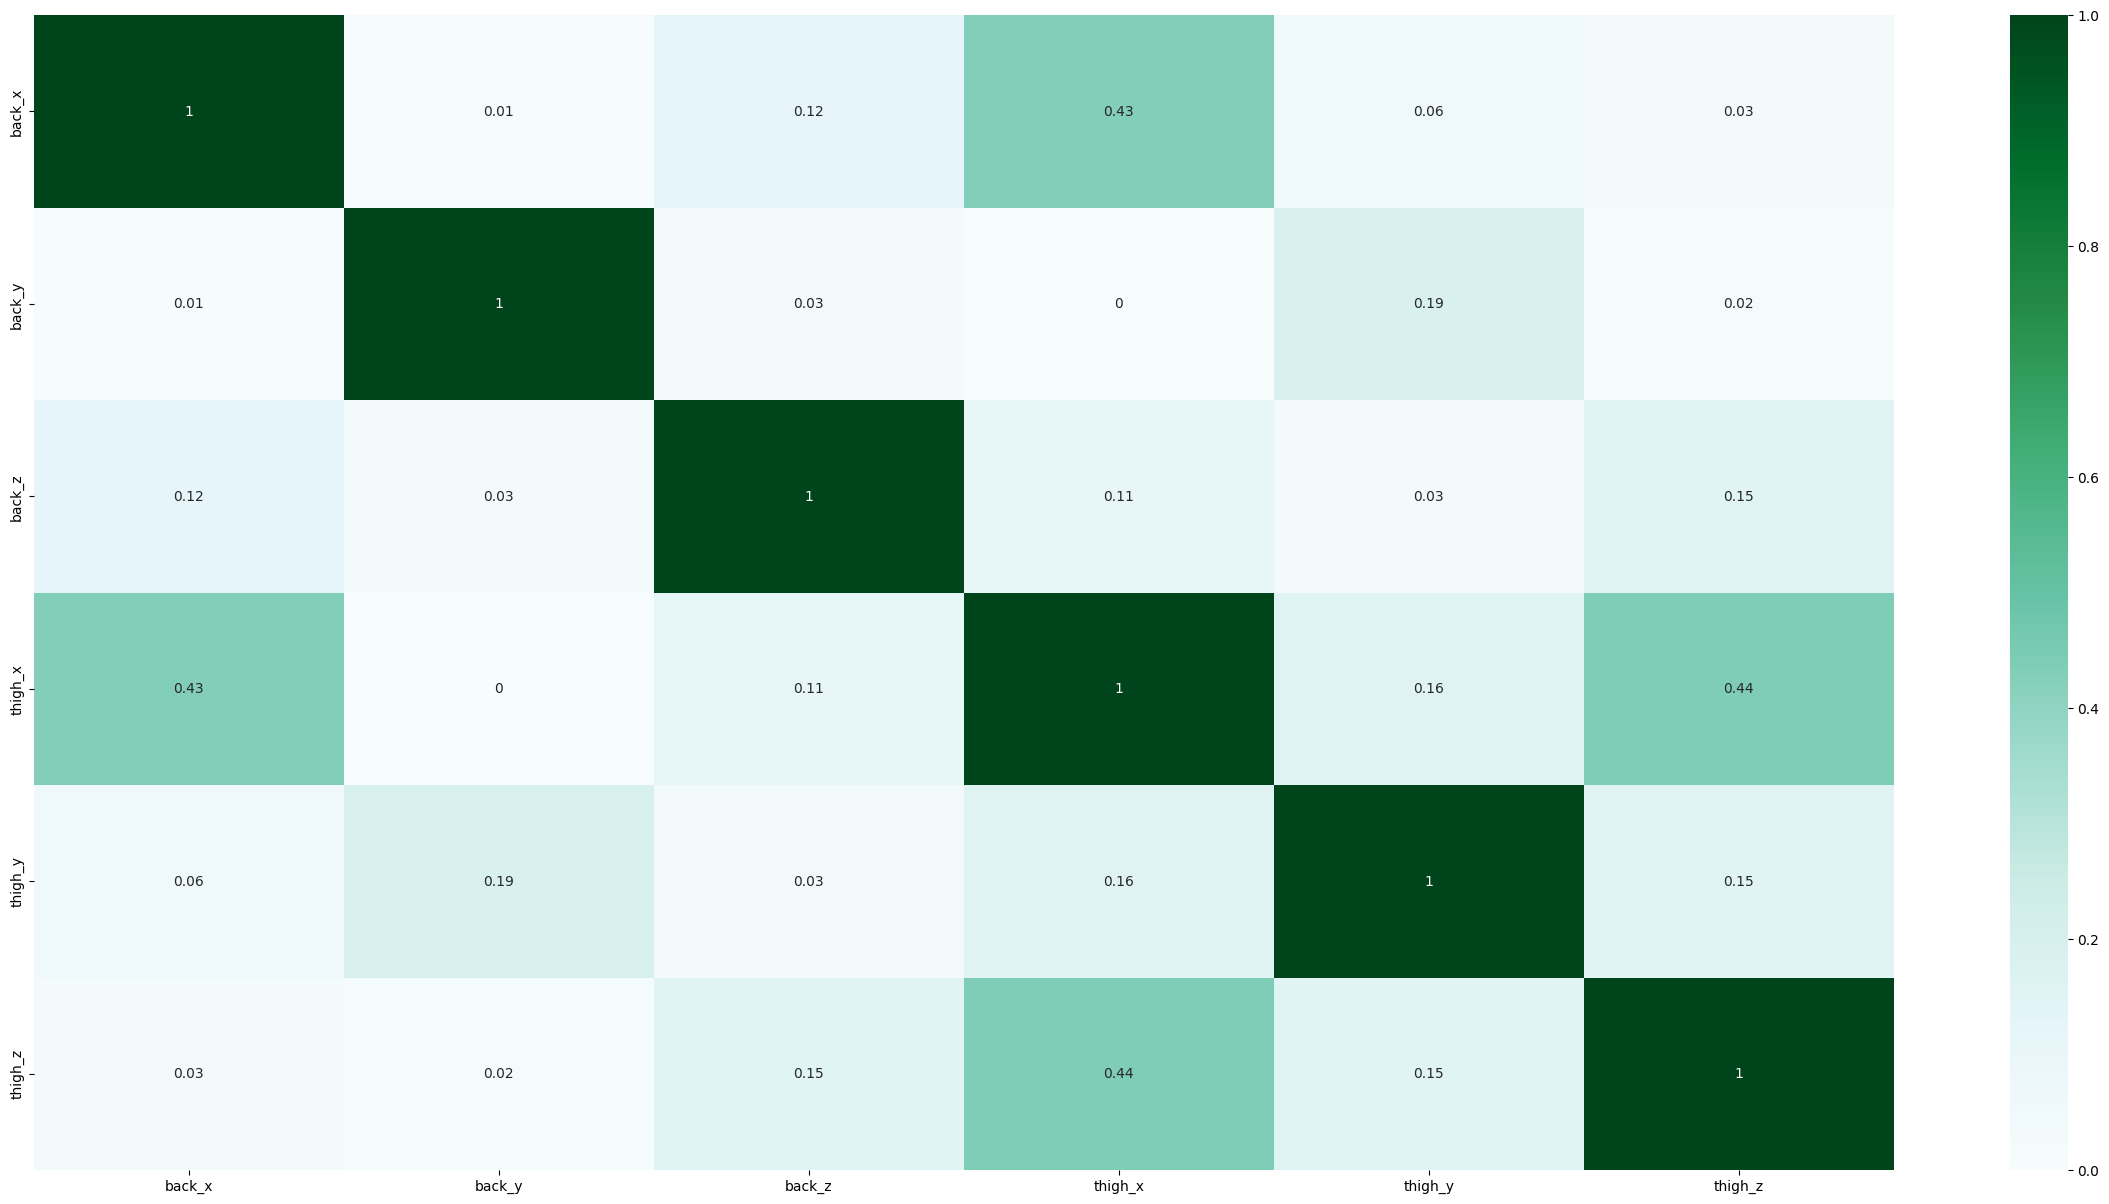

In [9]:
create_corr_matrix(zdata)

## Let's see how each class looks like

### Walking

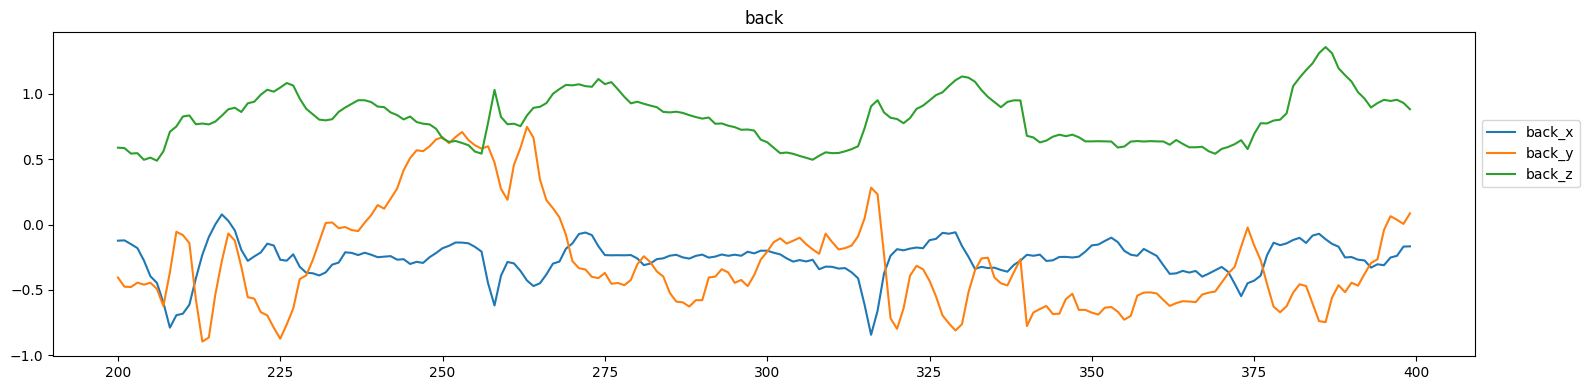

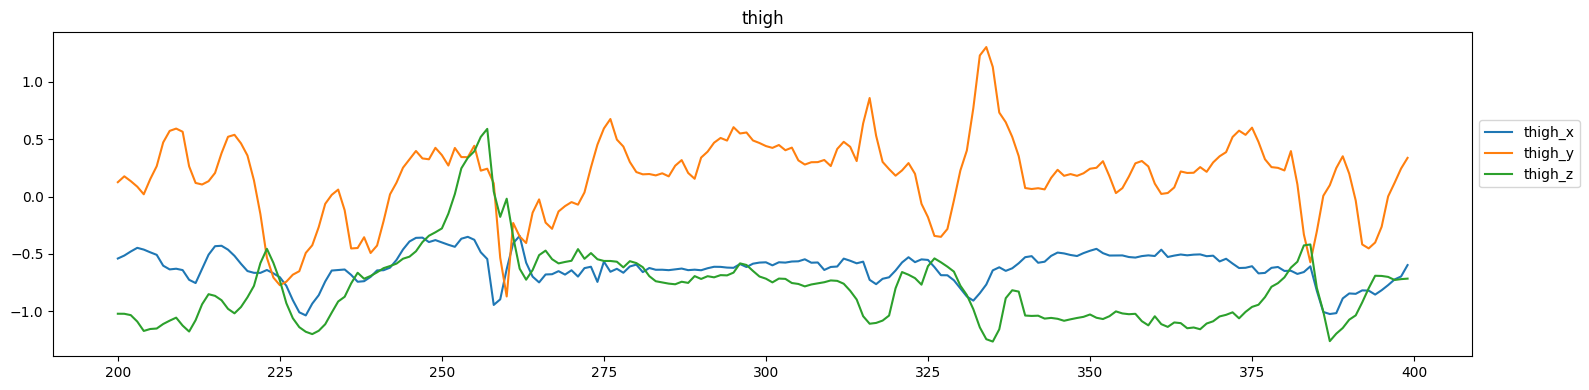

In [10]:
plot_activity(1,data_filtered_balanced,200)

### Running

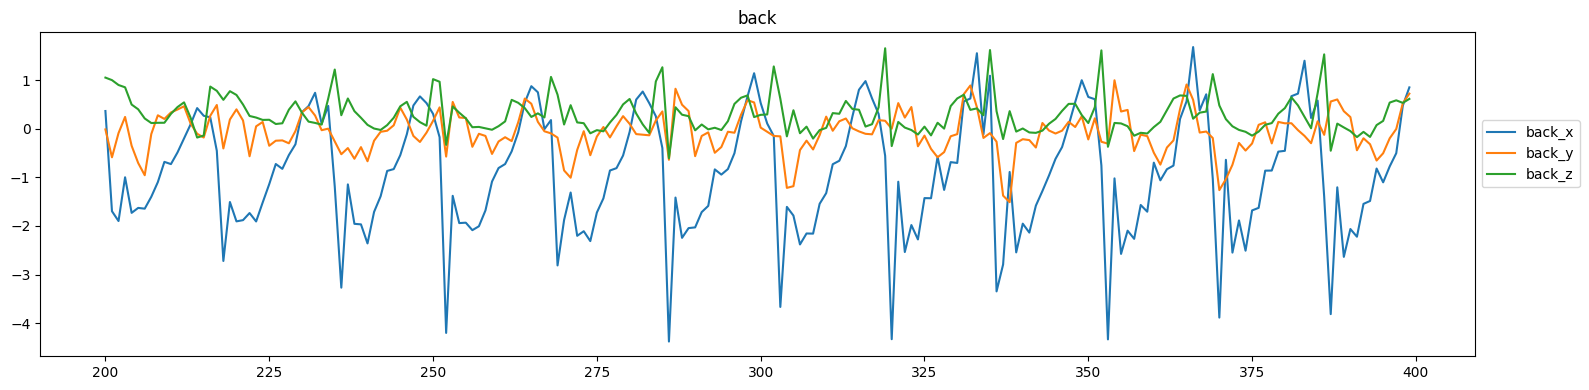

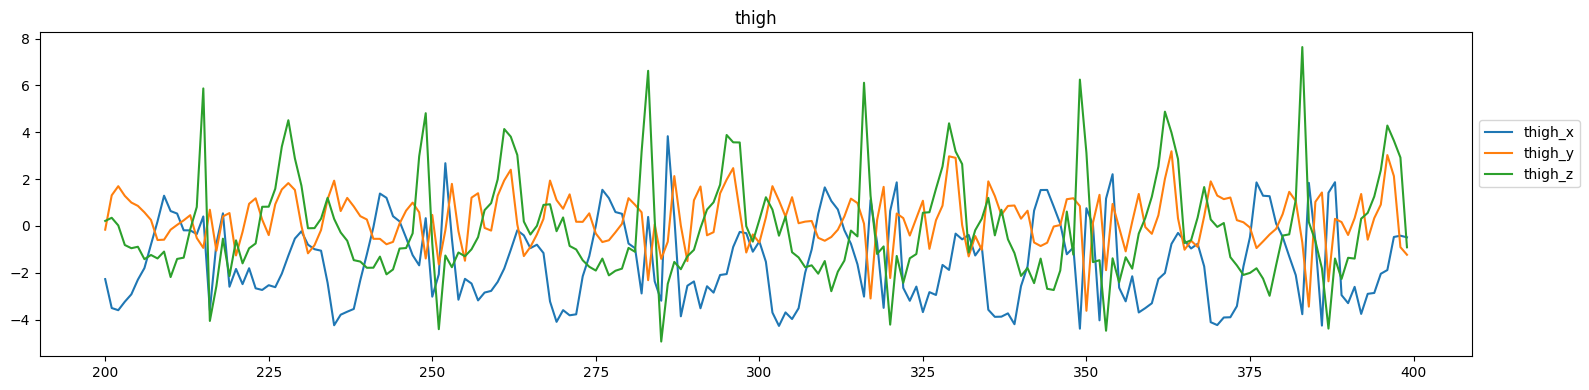

In [11]:
plot_activity(2,data,200)

# CLASSIFICATION

### 2D CONVOLUTIONAL NEURAL NETWORK

In [12]:
data_new,labels=window_data(200,50,data_filtered)
reshaped_data = np.asarray(data_new)
labels_ar=np.asarray(labels)
print(labels_ar.shape)
reshaped_data = reshaped_data.astype(float).reshape(-1, 200, 6)
reshaped_data_nn=reshaped_data.reshape(-1,200,6,1)
model, evaluation_results = nn(reshaped_data_nn, labels_ar)
print("Evaluation results:", evaluation_results)

(42515,)
(34012, 200, 6, 1)
(34012,)
Epoch 1/10


/home/lefteris/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-06-04 13:16:38.319127: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-04 13:16:38.324742: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-04 13:16:38.328848:

  91/1063 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6798 - loss: 1.1674

I0000 00:00:1717496201.633119   24476 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1063/1063 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8589 - loss: 0.5045 - val_accuracy: 0.9270 - val_loss: 0.2237
Epoch 2/10
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9291 - loss: 0.2159 - val_accuracy: 0.9400 - val_loss: 0.1759
Epoch 3/10
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9406 - loss: 0.1799 - val_accuracy: 0.9439 - val_loss: 0.1674
Epoch 4/10
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9478 - loss: 0.1566 - val_accuracy: 0.9465 - val_loss: 0.1712
Epoch 5/10
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9553 - loss: 0.1314 - val_accuracy: 0.9463 - val_loss: 0.1855
Epoch 6/10
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9612 - loss: 0.1145 - val_accuracy: 0.9490 - val_loss: 0.1785
Epoch 7/10
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9658 - loss: 0.0958 - val_accuracy: 0.9452 - val_loss: 0.1789
Epoch 8/10
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9715 - loss: 0.0827 - val_accurac

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 199, 5, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 199, 5, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 198, 4, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 198, 4, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 197, 3, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 197, 3, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 75648)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     9,683,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,177,798 (111.30 MB)

 Trainable params: 9,725,932 (37.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,451,866 (74.20 MB)

### RANDOM FOREST ALGORITHM

In [14]:
random_forest_data1=get_balanced_dataset(zdata,100000)
random_forest_data2=get_balanced_dataset(data_filtered,100000)

(948934, 7)
(948202, 7)


/home/lefteris/.local/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.798737532075432
F1 score: 0.7953912047901345


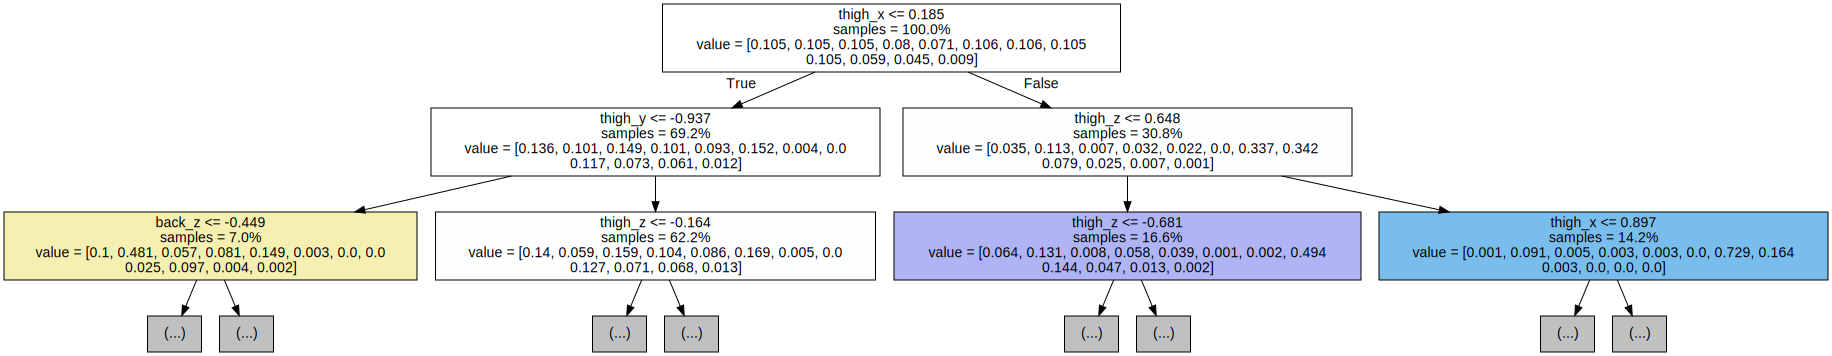

In [15]:
display(random_forest(random_forest_data1[['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']],random_forest_data1[['label']]))

### BAYESIAN NETWORK

In [16]:
bayesian_network_data=descritize_by_bounds(data_filtered[['back_x','back_y','back_z','thigh_x','thigh_y','thigh_z']])
bayesian_network_data['labels']=data_filtered['label']
print(bayesian_network_data.shape)


(6377367, 7)


In [17]:
print(bayesian_network_data)

        back_x back_y    back_z    thigh_x thigh_y thigh_z  labels
0          avg    avg      high        low     avg     low       6
1          avg    avg      high        low     avg     low       6
2          avg    avg      high        low     avg     low       6
3          avg    avg      high        low     avg     low       6
4          avg    avg      high        low     avg     low       6
...        ...    ...       ...        ...     ...     ...     ...
6461323   high    avg       low       high     avg    high       7
6461324    avg    avg       low       high     avg    high       7
6461325   high    avg       low  very high     avg    high       7
6461326    avg    avg       low       high     avg    high       7
6461327   high    avg  very low  very high     avg    high       7

[6377367 rows x 7 columns]


In [18]:
model,accuracy=bay_net_structure(bayesian_network_data)

  0%|          | 11/1000000 [00:07<186:19:50,  1.49it/s]


Learned structure edges: [('back_x', 'thigh_x'), ('back_z', 'back_x'), ('back_z', 'thigh_y'), ('thigh_y', 'back_y'), ('thigh_z', 'back_z'), ('labels', 'thigh_z'), ('labels', 'thigh_x'), ('labels', 'back_x'), ('labels', 'thigh_y'), ('labels', 'back_y'), ('labels', 'back_z')]
Model CPDs: [<TabularCPD representing P(back_x:5 | back_z:5, labels:12) at 0x71813ddb66e0>, <TabularCPD representing P(back_y:5 | labels:12, thigh_y:5) at 0x71813ddb7d90>, <TabularCPD representing P(back_z:5 | labels:12, thigh_z:5) at 0x71813de28850>, <TabularCPD representing P(thigh_x:5 | back_x:5, labels:12) at 0x71813de28790>, <TabularCPD representing P(thigh_y:5 | back_z:5, labels:12) at 0x71813de28070>, <TabularCPD representing P(thigh_z:5 | labels:12) at 0x71813de28a90>, <TabularCPD representing P(labels:12) at 0x71813de284c0>]


100%|██████████| 11682/11682 [00:03<00:00, 3215.03it/s] 


Predictive Accuracy: 0.8135994932080152
F1 score: 0.7892087087635703


# CLUSTERING 

### Mini Batch K-Means

(117853, 7)
0.3813509712574993


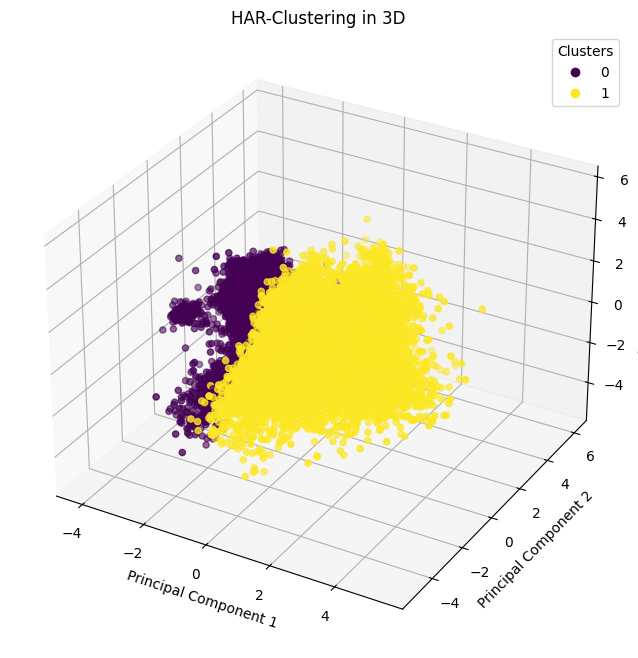

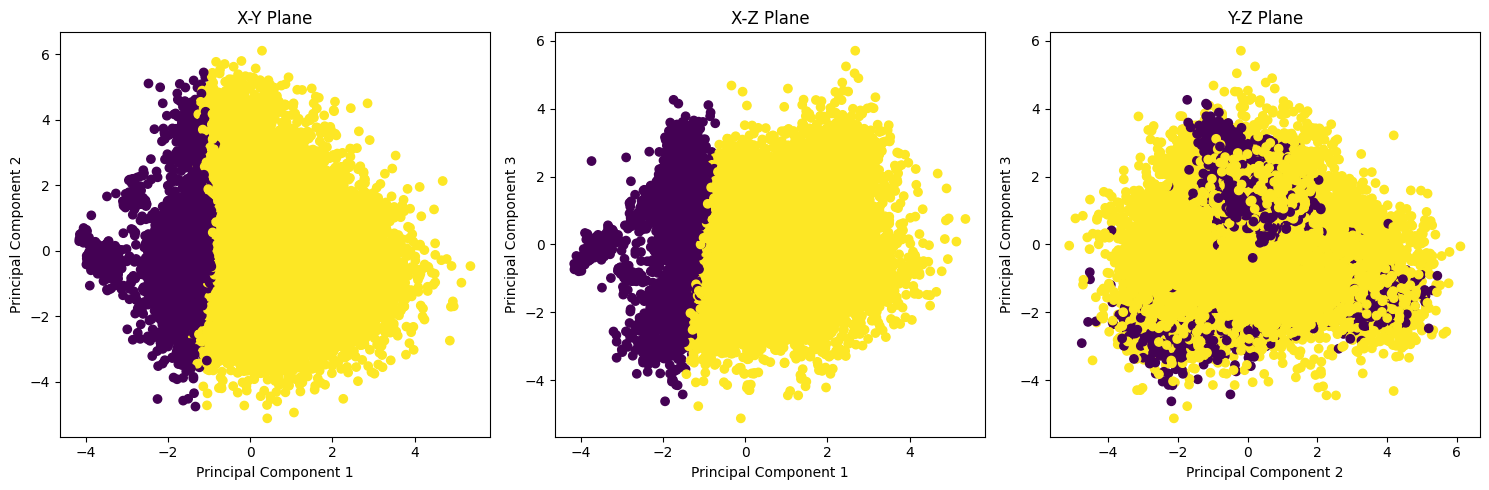

real_labels  clusters
1            1           10000
6            1           10000
9            1           10000
8            0           10000
7            1           10000
3            1           10000
4            1            9842
5            1            9676
2            1            8897
11           1            7551
10           1            7088
12           1            4022
             0            3831
10           0            2912
11           0            2449
2            0            1103
5            0             324
4            0             158
Name: count, dtype: int64


In [9]:
data_filtered_balanced_clustering=get_balanced_dataset(data_filtered,10000)
X_data_kmeans=data_filtered_balanced_clustering[['back_x','back_y','back_z','thigh_x','thigh_y','thigh_z']]
Y_data_kmeans=data_filtered_balanced_clustering['label']


labels_kmeans,validationdb_df,shil=minibatch_kmeans(X_data_kmeans,Y_data_kmeans,2)

val_db=validationdb_df.value_counts()

x=pca_test(X_data_kmeans,3)
cluster3D(x,labels_kmeans)
cluster2D(x,labels_kmeans)
print(val_db)

In [6]:
purity_metric(val_db)

Purity: 0.12070998888521224


In [ ]:
print(validationdb_df[validationdb_df['clusters']==0]['real_labels'].value_counts())

### DBSCAN

DBSCAN silouette score --->0.3936506867835108


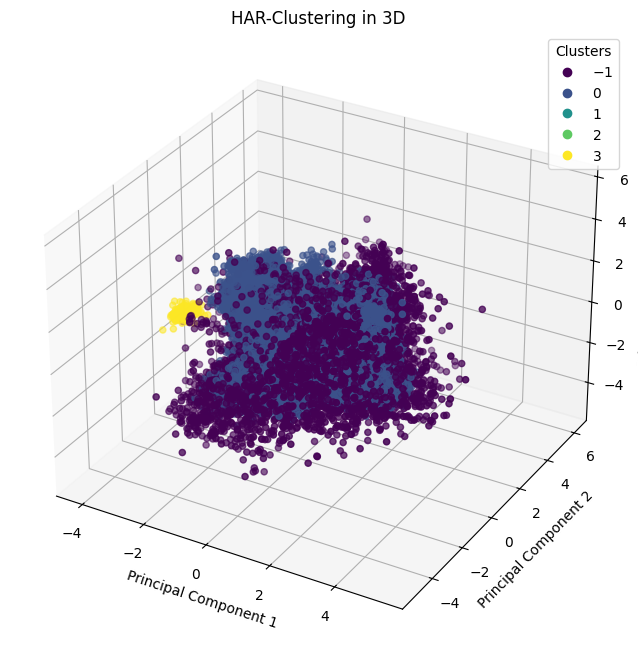

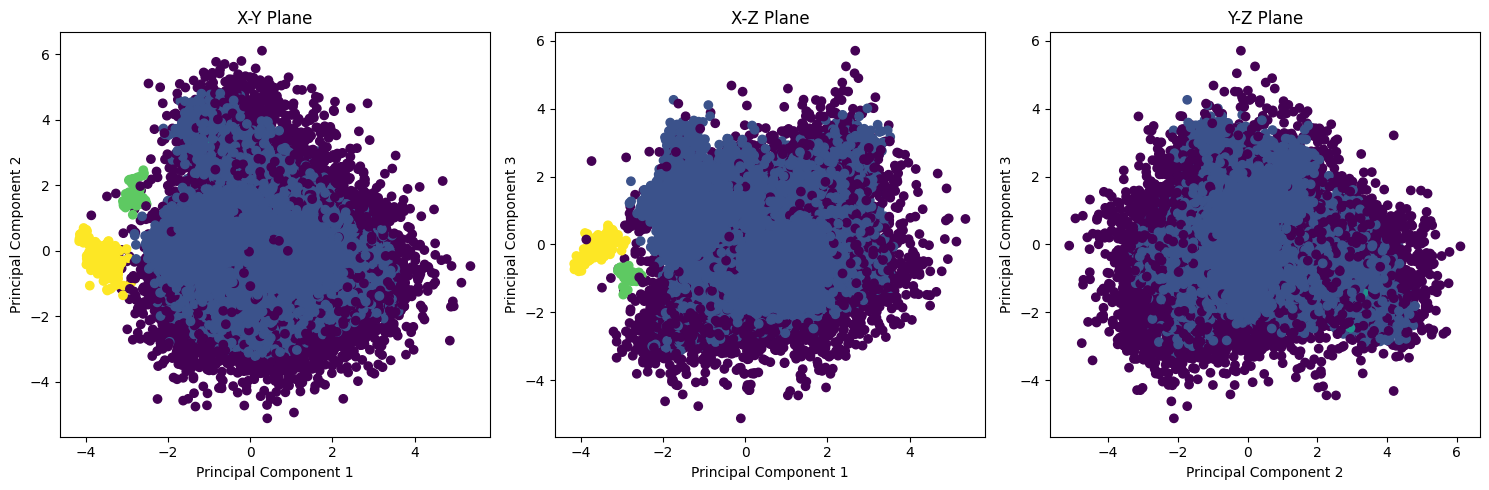

real_labels  clusters
6             0          10000
7             0          10000
9             0           9997
3             0           9996
11            0           9983
1             0           9901
4             0           9358
8             3           9193
10            0           9095
5             0           8879
12            0           7833
2             0           6275
             -1           3592
5            -1           1120
10           -1            905
8             2            782
4            -1            637
2             1            133
1            -1             99
8            -1             25
12           -1             20
11           -1             17
4             1              5
3            -1              4
9            -1              3
5             1              1
Name: count, dtype: int64


In [10]:
X_data_db=data_filtered_balanced_clustering[['back_x','back_y','back_z','thigh_x','thigh_y','thigh_z']]
Y_data_db=data_filtered_balanced_clustering['label']

labels_dbscan,validationdb_df,shil=dbscan(X_data_db,Y_data_db,1)

val_db=validationdb_df.value_counts()

x=pca_test(X_data_db,3)
cluster3D(x,labels_dbscan)
cluster2D(x,labels_dbscan)
print(val_db)
purity_metric(val_db)

In [12]:
print(validationdb_df[validationdb_df['clusters']==3]['real_labels'].value_counts())

real_labels
8    9193
Name: count, dtype: int64


### BIRCH

(84000, 7)
BIRCH silouette score --->0.33585363276960806


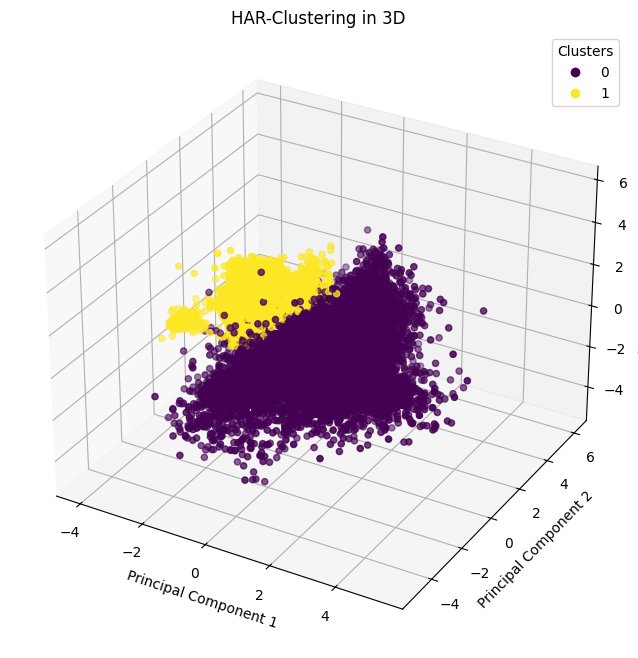

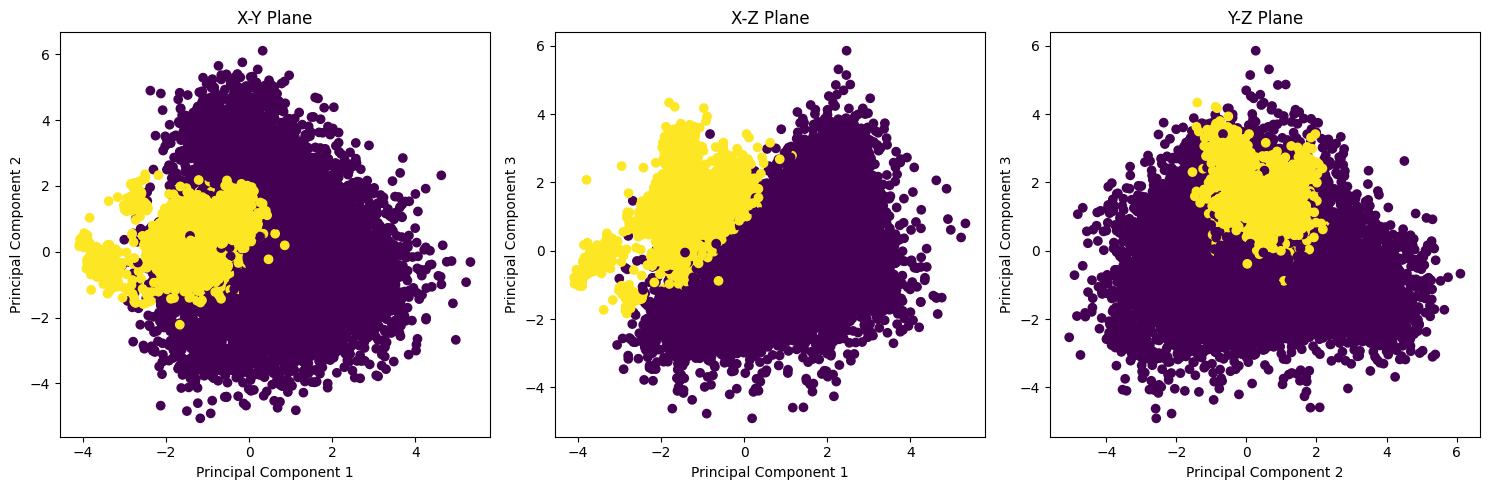

Purity: 0.16666666666666666


In [13]:
data_filtered_bir=get_balanced_dataset(data_filtered,7000)
X_data_bir=data_filtered_bir[['back_x','back_y','back_z','thigh_x','thigh_y','thigh_z']]
Y_data_bir=data_filtered_bir['label']
labels_birch,validationdb_df,shil=birch(X_data_bir,Y_data_bir,2,0.01,50)

val_db=validationdb_df.value_counts()

x=pca_test(X_data_bir,3)
cluster3D(x,labels_birch)
cluster2D(x,labels_birch)
purity_metric(val_db)

In [ ]:
print(val_db)